<a href="https://colab.research.google.com/github/JaimeRamiro/HTML_Tareas/blob/main/Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Length of time: 132952
Length of dataset: 132952


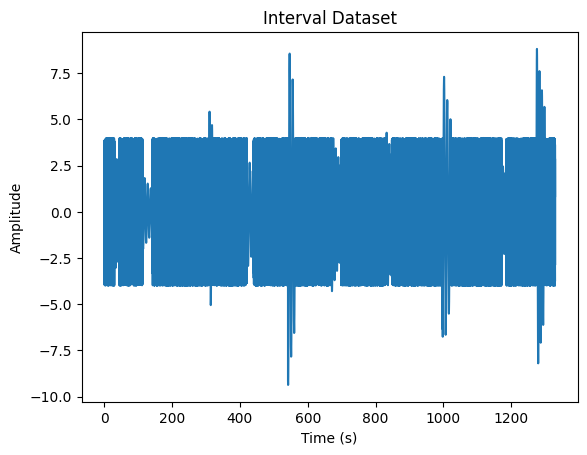

In [1]:
# Importing numpy library as np for mathematical operations
import numpy as np
# Importing matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Total number of seconds of data to be generated
TOTAL_SECONDS = 10000

# Sampling rate (number of samples per second)
SAMPLING_RATE = 100

# Total number of samples to be generated
NUM_SAMPLES = TOTAL_SECONDS * SAMPLING_RATE

# Time before the first step starts (in seconds)
TIME_BEFORE_FIRST_STEP = 30

# Time after the last step ends (in seconds)
TIME_AFTER_LAST_STEP = 30

# Start and end times for the interval with 1s (in seconds)
START_TIME = TIME_BEFORE_FIRST_STEP
END_TIME = TOTAL_SECONDS - TIME_AFTER_LAST_STEP

# Interval between steps (in seconds), with a minimum and maximum value
INTERVAL_BETWEEN_STEPS_MIN = 60
INTERVAL_BETWEEN_STEPS_MAX = 180

# Duration of steps (in seconds), with a minimum and maximum value
MIN_STEP_DURATION = 10
MAX_STEP_DURATION = 30

# Number of steps to be generated
NUM_STEPS = 10

# Limits for random numbers for intervals with 0s
LIMIT_LOW = -4
LIMIT_HIGH = 4

# Minimum and maximum period for sine wave (in seconds)
MIN_PERIOD = 5
MAX_PERIOD = 10

# Minimum and maximum amplitude for sine wave
MIN_AMPLITUDE = 2
MAX_AMPLITUDE = 10

# Function to convert seconds to samples
def sec_to_samples(seconds):
    """Converts seconds to samples by multiplying it with the sampling rate."""
    return int(seconds * SAMPLING_RATE)


# Generate time values for each sample
time = np.linspace(0, TOTAL_SECONDS, NUM_SAMPLES)

# Generate the dataset with 0s
dataset = np.zeros(NUM_SAMPLES)

# Calculate the start and end times for each interval (in samples)
interval_starts = np.zeros(NUM_STEPS, dtype=int)
interval_ends = np.zeros(NUM_STEPS, dtype=int)
for i in range(NUM_STEPS):
    # if it's the first step, set the start time to the defined start time
    if i == 0:
        interval_starts[i] = sec_to_samples(START_TIME)
    # if it's not the first step, set the start time as the end time of the previous step
    # plus a random interval between steps, generated by randint
    else:
        interval_between_steps = np.random.randint(sec_to_samples(INTERVAL_BETWEEN_STEPS_MIN),
                                                   sec_to_samples(INTERVAL_BETWEEN_STEPS_MAX) + 1)
        interval_starts[i] = interval_ends[i - 1] + interval_between_steps
    # generate a random interval length for this step
    interval_length = np.random.randint(sec_to_samples(MIN_STEP_DURATION), sec_to_samples(MAX_STEP_DURATION) + 1)
    # set the end time of this step as the start time plus the interval length
    interval_ends[i] = interval_starts[i] + interval_length

# Fill in the intervals with 1s
for i in range(NUM_STEPS):
    start, end = interval_starts[i], interval_ends[i]
    # This loop sets the value of the dataset array to 1 for the interval [start:end]
    dataset[start:end] = 1

# The following loop fills in the dataset with a sine wave between intervals (1s)
start = 0
for i in range(len(dataset)):
    # Check if the current value in the dataset is 1
    if dataset[i] == 1:
        # If this is the first occurrence of a 1, set start to the current index
        if start == 0:
            start = i
    else:
        # If this is not a 1, set the value in the dataset to a random value between LIMIT_LOW and LIMIT_HIGH
        dataset[i] = np.random.uniform(LIMIT_LOW, LIMIT_HIGH)
        # If start is not 0, this means that a sequence of 1s has ended, so a sine wave should be generated
        if start != 0:
            end = i
            # Generate time values for the current interval
            time_interval = np.linspace(start, end, end - start)
            # Generate a random amplitude between MIN_AMPLITUDE and MAX_AMPLITUDE
            random_amplitude = np.random.uniform(MIN_AMPLITUDE, MAX_AMPLITUDE)
            # Generate a random period between MIN_PERIOD and MAX_PERIOD, scaled by SAMPLING_RATE
            random_period = np.random.uniform(MIN_PERIOD, MAX_PERIOD) * SAMPLING_RATE
            # Fill in the current interval with a sine wave, scaled by the random amplitude and with a period of random_period
            # The sine wave is also multiplied by an exponential decay function, centered around the start of the interval, and with a decay time constant of 5000.
            dataset[start:end] = random_amplitude * np.sin(2 * np.pi / random_period * time_interval) * np.exp(-(time_interval - start) / 5000)
            # Reset the start variable, so that the next interval can be processed
            start = 0


# Plotting the final dataset after cropping
last_step_end = interval_ends[-1] + sec_to_samples(TIME_AFTER_LAST_STEP)
dataset = dataset[:last_step_end]

# Recalcular time para que coincida con el tamaño de dataset
time = np.arange(0, len(dataset)) / SAMPLING_RATE

# Verifica que `time` y `dataset` tengan la misma longitud antes de concatenar
print(f"Length of time: {len(time)}")
print(f"Length of dataset: {len(dataset)}")

# Concatenate the time and dataset arrays
result = np.column_stack((time, dataset))

# Save the resulting array in a CSV file
np.savetxt("dataset.csv", result, delimiter=",", fmt="%.4f")

# Plotting the dataset
plt.plot(time, dataset)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Interval Dataset")
plt.show()
